In [ ]:
# 1) Feature scaling is important for Kmeans because it clusters based on euclidean distance. If the data is not scaled, it will not work properly.

# 2) E

# 3) One problem with initial random clustering in kmeans is you can overfit your data if you have too many clusters. This is because the highest
#    number of clusters we can have, n, can be equal to the number of data points we have. However, this is not very useful. 

In [45]:
# importing libraries
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


# defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'webster-data445-bucket'
bucket = s3.Bucket(bucket_name)

# defining the csv file
file_key = 'Mall_Customers.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

# reading csv file
customers = pd.read_csv(file_content_stream)
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [46]:
# transforming data
scaler = MinMaxScaler()

customers[['Age_0_1', 'AnnualIncome_0_1']] = scaler.fit_transform(customers[['Age', 'Annual Income (k$)']])
customers['Gender_0_1'] = customers['Gender'].replace(to_replace = ['Male', 'Female'], value = ['1', '0'])
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_0_1,AnnualIncome_0_1,Gender_0_1
0,1,Male,19,15,39,0.019231,0.000000,1
1,2,Male,21,15,81,0.057692,0.000000,1
2,3,Female,20,16,6,0.038462,0.008197,0
3,4,Female,23,16,77,0.096154,0.008197,0
4,5,Female,31,17,40,0.250000,0.016393,0


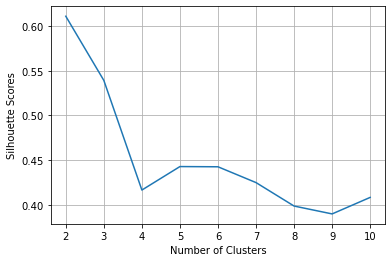

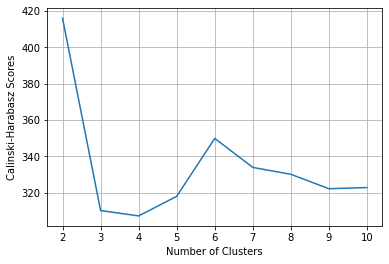

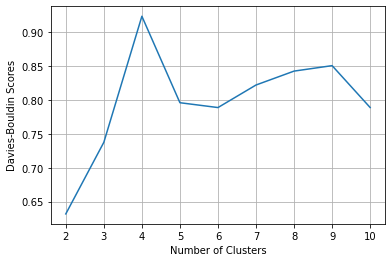

In [50]:
# defining a list to store silhouette scores
sil_score = []
cal_score = []
dav_score = []

for i in range(2, 11):
    
    # clustering the data
    kmeans_md = KMeans(n_clusters = i, n_init = 20).fit(customers[['Age_0_1', 'AnnualIncome_0_1', 'Gender_0_1']])
    kmeans_label = kmeans_md.labels_
    
    # computing silhouette, calinski, and davies scores
    sil_score.append(silhouette_score(customers[['Gender_0_1', 'Age_0_1', 'AnnualIncome_0_1']], kmeans_label))
    cal_score.append(calinski_harabasz_score(customers[['Gender_0_1', 'Age_0_1', 'AnnualIncome_0_1']], kmeans_label))
    dav_score.append(davies_bouldin_score(customers[['Gender_0_1', 'Age_0_1', 'AnnualIncome_0_1']], kmeans_label))

    

# visualizing silhouette scores
plt.plot(range(2, 11), sil_score)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Scores')
plt.grid()
plt.show()

# visualizing Calinski-Harabasz scores
plt.plot(range(2, 11), cal_score)
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Scores')
plt.grid()
plt.show()

# visualizing Davies Bouldin scores
plt.plot(range(2, 11), dav_score)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Scores')
plt.grid()
plt.show()

## Based on our silhouette score and Calinski-Harabasz scores, we would want to use 2 clusters. However, our Davies Bouldin score wants us to use four clusters. 
## I will start with 2 clusters, but I will check 4 clusters if it does not look right.

In [53]:
# clustering using 2 clusters with kmeans
kmeans_md2 = KMeans(n_clusters = 2, n_init = 20).fit(customers[['Age_0_1', 'AnnualIncome_0_1', 'Gender_0_1']])

customers['cluster'] = kmeans_md2.labels_
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_0_1,AnnualIncome_0_1,Gender_0_1,cluster
0,1,Male,19,15,39,0.019231,0.000000,1,1
1,2,Male,21,15,81,0.057692,0.000000,1,1
2,3,Female,20,16,6,0.038462,0.008197,0,0
3,4,Female,23,16,77,0.096154,0.008197,0,0
4,5,Female,31,17,40,0.250000,0.016393,0,0


In [55]:
# Female cluster
cluster_0 = customers[customers['cluster'] == 0].reset_index(drop = True)
cluster_0.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Age_0_1,AnnualIncome_0_1,cluster
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.0
mean,97.562500,38.098214,59.250000,51.526786,0.386504,0.362705,0.0
std,58.276412,12.644095,26.011952,24.114950,0.243156,0.213213,0.0
min,3.000000,18.000000,16.000000,5.000000,0.000000,0.008197,0.0
25%,46.750000,29.000000,39.750000,35.000000,0.211538,0.202869,0.0
50%,94.500000,35.000000,60.000000,50.000000,0.326923,0.368852,0.0
75%,148.250000,47.500000,77.250000,73.000000,0.567308,0.510246,0.0
max,197.000000,68.000000,126.000000,99.000000,0.961538,0.909836,0.0


In [56]:
# Male cluster
cluster_1 = customers[customers['cluster'] == 1].reset_index(drop = True)
cluster_1.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Age_0_1,AnnualIncome_0_1,cluster
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.0
mean,104.238636,39.806818,62.227273,48.511364,0.419362,0.387109,1.0
std,57.483830,15.514812,26.638373,27.896770,0.298362,0.218347,0.0
min,1.000000,18.000000,15.000000,1.000000,0.000000,0.000000,1.0
25%,59.500000,27.750000,45.500000,24.500000,0.187500,0.250000,1.0
50%,106.500000,37.000000,62.500000,50.000000,0.365385,0.389344,1.0
75%,151.250000,50.500000,78.000000,70.000000,0.625000,0.516393,1.0
max,200.000000,70.000000,137.000000,97.000000,1.000000,1.000000,1.0


In [ ]:
## These results appear to mostly make sense. There appears to be a higher number of females at the mall than males. However, on average males spend more
## time in the mall than females. 